# Transfer Learning

Head has been trained with 1e-3 learning rate.

## Import Packages

In [1]:
# !pip uninstall ml_project_util -y
# !pip install git+https://github.com/aris-gk3/ml_project_util.git
# or for local development:
%pip uninstall ml_project_util -y
%pip install git+https://github.com/aris-gk3/ml_project_util.git

import tensorflow as tf
import os
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
# Local Packages
from ml_project_util.path import path_definition
from ml_project_util.train import train, freeze_layers, unfreeze_head, unfreeze_block
from ml_project_util.quantization_util import quant_model, quant_bw_search
from ml_project_util.model_evaluation import model_evaluation_precise

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/aris-gk3/ml_project_util.git to /tmp/pip-req-build-h0oyw_64
  Running command git clone --filter=blob:none --quiet https://github.com/aris-gk3/ml_project_util.git /tmp/pip-req-build-h0oyw_64
  Resolved https://github.com/aris-gk3/ml_project_util.git to commit d7efaad36089c8469c6c2e13af236643ac518494
  Preparing metadata (setup.py) ... done
  Created wheel for ml_project_util: filename=ml_project_util-0.1-py3-none-any.whl size=22709 sha256=4777544b504f97be3e29df3755e34df9091d919f76052ded1eee52cdf8ec6bdc
  Stored in directory: /tmp/pip-ephem-wheel-cache-ev5v5kjd/wheels/9b/33/7a/e8e8f55a4c6aa39df26369c48b9e3497c6dde4c7663912f8ef
Successfully built ml_project_util
Note: you may need to restart the kernel to use updated packages.


2025-06-15 15:26:00.021744: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750001160.207848      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750001160.259216      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Define Variable Paths

In [2]:
dict = path_definition(ds_rel_path='uc-merced-21-restructured-and-converted') # path_definition.config to read
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

ds_rel_path set to: uc-merced-21-restructured-and-converted


## Define the Model

In [3]:
saved_model_name = 'UC1_P1'
parent_name = saved_model_name[:3]
model_path = '/kaggle/input/uc1_p1/keras/default/1/UC1_P1_020_val0.2210.keras'
# model_path = f"{PATH_SAVEDMODELS}/{parent_name}/{model_name}.keras"
model = tf.keras.models.load_model(model_path)

I0000 00:00:1750001175.905145      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


## Train the Model

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d (GlobalAveragePooling2D), Trainable: False
- dense (Dense), Trainable: False
- dropout (Dropout), Trainable: False
- dense_1 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainable: Fal

I0000 00:00:1750001184.568679      97 service.cc:148] XLA service 0x7a97b0011ba0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750001184.569513      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750001185.078045      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/42 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8984 - loss: 0.4962 

I0000 00:00:1750001194.452254      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.8198 - loss: 0.6408
Epoch 1: saving model to /kaggle/working/SavedModels/UC1/UC1_P1_FT_001_val0.4383.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 517ms/step - accuracy: 0.8198 - loss: 0.6390 - val_accuracy: 0.8542 - val_loss: 0.4383
Epoch 2/35
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.8990 - loss: 0.3257
Epoch 2: saving model to /kaggle/working/SavedModels/UC1/UC1_P1_FT_002_val0.2563.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 416ms/step - accuracy: 0.8990 - loss: 0.3254 - val_accuracy: 0.9107 - val_loss: 0.2563
Epoch 3/35
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.9198 - loss: 0.2661
Epoch 3: saving model to /kaggle/working/SavedModels/UC1/UC1_P1_FT_003_val0.2897.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 418ms/step - accuracy: 0.9198 - loss: 0.2660 - val_accuracy: 0.8988 - val_loss: 0.2897
Epoch 4/35
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.9287 - loss: 0.2083
Epoch 4: saving model to /kaggle/working/SavedModels

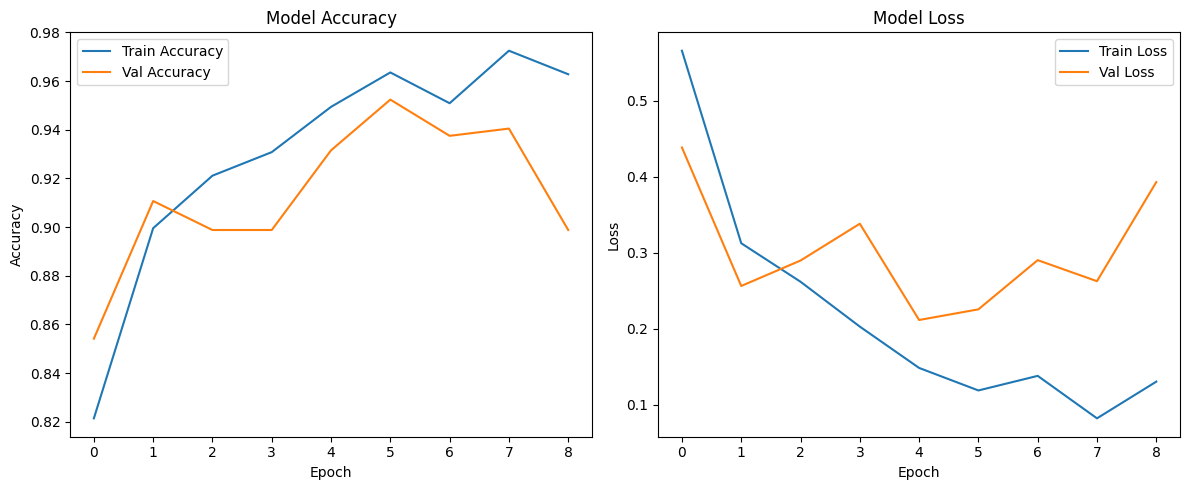

In [4]:
model_name = 'UC1_P1_FT'
epochs = 35
lr = 1e-4
optimizer = 'Adam'

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
], name="data_augmentation")

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [5]:
model_evaluation_precise(model)

Found 420 files belonging to 21 classes.
Start evaluating batches
Batch Number: 13
Precise test accuracy: 0.90238
Precise test loss: 0.43713


(0.90238094, 0.43712531789829623)

In [6]:
saved_model_name = 'UC1_P1'
parent_name = saved_model_name[:3]
model_path = '/kaggle/input/uc1_p1/keras/default/1/UC1_P1_020_val0.2210.keras'
# model_path = f"{PATH_SAVEDMODELS}/{parent_name}/{model_name}.keras"
model = tf.keras.models.load_model(model_path)

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d (GlobalAveragePooling2D), Trainable: False
- dense (Dense), Trainable: False
- dropout (Dropout), Trainable: False
- dense_1 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainable: Fal

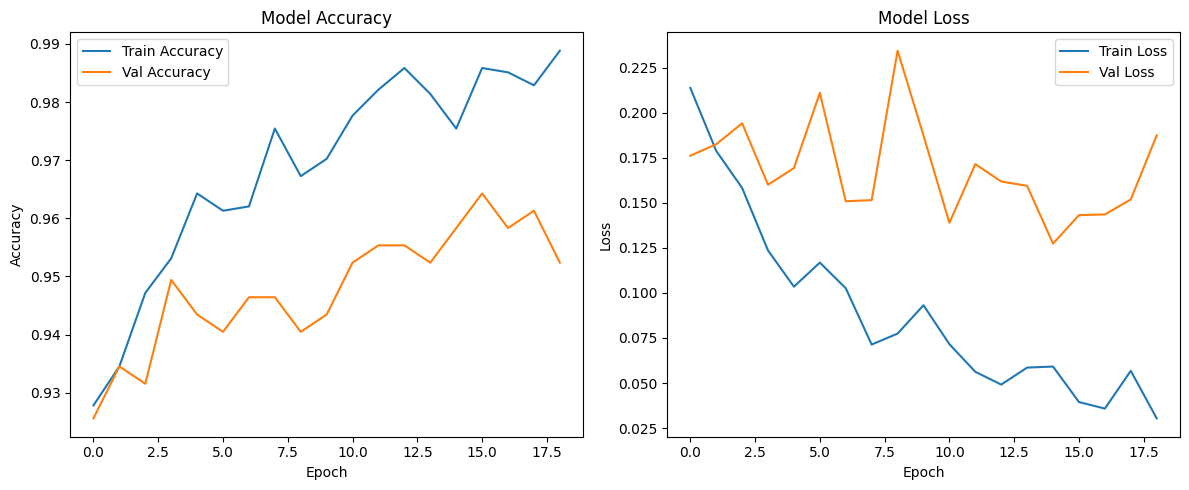

In [7]:
model_name = 'UC1_P1_FT2'
epochs = 40
lr = 1e-5
optimizer = 'Adam'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [8]:
model_evaluation_precise(model)

Found 420 files belonging to 21 classes.
Start evaluating batches
Batch Number: 13
Precise test accuracy: 0.95714
Precise test loss: 0.13124


(0.95714283, 0.13123959870565505)

In [9]:
saved_model_name = 'UC1_P1'
parent_name = saved_model_name[:3]
model_path = '/kaggle/input/uc1_p1/keras/default/1/UC1_P1_020_val0.2210.keras'
# model_path = f"{PATH_SAVEDMODELS}/{parent_name}/{model_name}.keras"
model = tf.keras.models.load_model(model_path)

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d (GlobalAveragePooling2D), Trainable: False
- dense (Dense), Trainable: False
- dropout (Dropout), Trainable: False
- dense_1 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainable: Fal

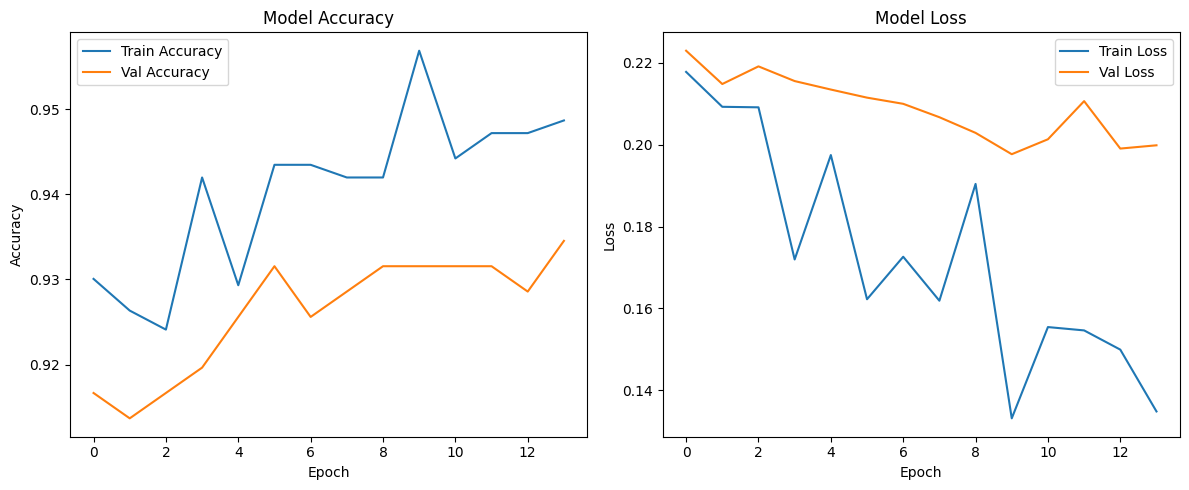

In [10]:
model_name = 'UC1_P1_FT3'
epochs = 45
lr = 1e-6
optimizer = 'Adam'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
unfreeze_block(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [11]:
model_evaluation_precise(model)

Found 420 files belonging to 21 classes.
Start evaluating batches
Batch Number: 13
Precise test accuracy: 0.94048
Precise test loss: 0.17796


(0.9404762, 0.17796293621261913)